<a href="https://colab.research.google.com/github/AmanPriyanshu/Reinforcement-Learning/blob/master/ant_colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def take_map_input():
  n = int(input("Enter number of cities to be present:\t"))
  cities = [[int(i) for i in input("Enter co-ordinate of city ("+str(j)+"):\t").split()] for j in range(n)]
  return np.array(cities)

In [3]:
cities = np.random.randint(0, 50, (10, 2))

In [4]:
class AntColony:
  def __init__(self, cities, max_iterations):
    self.distance_power = 2
    self.distance_weightage = 0.1
    self.gradient = 0.2
    self.iteration = 0
    self.max_iterations = max_iterations
    self.alpha = 0.8
    self.smallest_path = None

    if type(cities)==list:
      cities = np.array(cities)
    self.cities = cities
    self.pheromone_strength = np.zeros((len(cities), len(cities)))
    self.distance_matrix = np.array([[np.sqrt(np.sum(np.square(city_j - city_i))) for city_j in cities] for city_i in cities])

  def ant_choose_next(self, init_pos, visited):
    if (len(visited)==len(self.cities)):
      choice = visited[0]
    else:
      distances = np.array([d for index, d in enumerate(self.distance_matrix[init_pos]) if index not in visited])
      distances = np.power(distances, self.distance_power)
      distances = 1/distances
      distances = distances/(np.sum(distances))
      phermones = np.array([d for index, d in enumerate(self.pheromone_strength[init_pos]) if index not in visited])
      if np.sum(phermones)!=0:
        phermones = phermones/(np.sum(phermones))
      evaluation = distances * self.distance_weightage + phermones * (1 - self.distance_weightage)
      evaluation = evaluation/np.sum(evaluation)
      choice = np.random.choice(np.array([i for i in range(len(self.cities)) if i not in visited]), p=evaluation)
    return choice

  def single_ant(self, init_pos):
    visited = [init_pos]
    choice = -1
    while(choice!=init_pos):
      choice = self.ant_choose_next(init_pos, visited)
      visited.append(choice)
    return visited

  def get_distance(self, visited):
    d = 0
    for i in range(len(visited)-1):
      d += self.distance_matrix[visited[i]][visited[i+1]]
    return d

  def plot_path(self, visited, details):
    plt.cla()
    for i in range(len(visited)-1):
      plt.plot([self.cities[visited[i]][0], self.cities[visited[i+1]][0]], [self.cities[visited[i]][1], self.cities[visited[i+1]][1]], 'black')
    plt.legend([str(details)])
    plt.pause(0.1)


  def ant_colony(self, n=50):
    colony_travels = np.array([self.single_ant(np.random.choice(np.arange(len(self.cities)))) for _ in range(n)])
    distance_covered_each_ant = []
    for visited in colony_travels:
      distance_covered_each_ant.append(self.get_distance(visited))
    distance_covered_each_ant = np.array(distance_covered_each_ant)
    indexes = np.argsort(distance_covered_each_ant)
    colony_travels = colony_travels[indexes]
    distance_covered_each_ant = distance_covered_each_ant[indexes]

    if self.iteration==0:
      self.smallest_path = colony_travels[0]
    else:
      if distance_covered_each_ant[0]<self.get_distance(self.smallest_path):
        self.smallest_path = colony_travels[0]

    ### Updating phermone trail

    for path, d in zip(colony_travels, distance_covered_each_ant):
      for i in range(len(path)-1):
        self.pheromone_strength[path[i]][path[i+1]] = (self.pheromone_strength[path[i]][path[i+1]]*self.alpha + self.gradient * np.power(1/d, self.distance_power) * (1-self.alpha))
        self.pheromone_strength[path[i+1]][path[i]] = (self.pheromone_strength[path[i+1]][path[i]]*self.alpha + self.gradient * np.power(1/d, self.distance_power) * (1-self.alpha))
    self.iteration += 1
    self.evaluate_phermone_trail()

    d = self.get_distance(self.smallest_path)
    for i in range(len(self.smallest_path)-1):
      self.pheromone_strength[self.smallest_path[i]][self.smallest_path[i+1]] = (self.pheromone_strength[self.smallest_path[i]][self.smallest_path[i+1]]*self.alpha + self.gradient * np.power(1/d, self.distance_power) * (1-self.alpha))
      self.pheromone_strength[self.smallest_path[i+1]][self.smallest_path[i]] = (self.pheromone_strength[self.smallest_path[i+1]][self.smallest_path[i]]*self.alpha + self.gradient * np.power(1/d, self.distance_power) * (1-self.alpha))

  def evaluate_phermone_trail(self):
    count = 1
    choice = 0
    visited = [choice]
    while(count != len(self.cities)):
      options = np.array([i for i in range(len(cities)) if i not in visited])
      ph = np.array([val for index, val in enumerate(self.pheromone_strength[choice]) if index in options])
      choice = options[np.argmax(ph)]
      visited.append(choice)
      count += 1
    if (self.get_distance(visited) < self.get_distance(self.smallest_path)):
      self.smallest_path = visited
    self.plot_path(visited, {'Phermone Distance':round(self.get_distance(visited), 4), 'Shortest yet':round(self.get_distance(self.smallest_path), 4)})

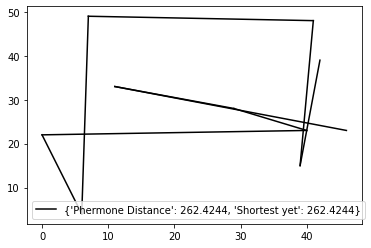

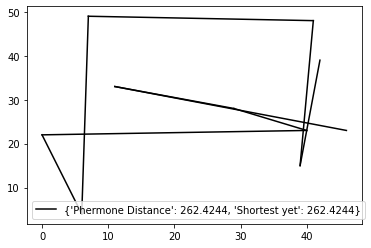

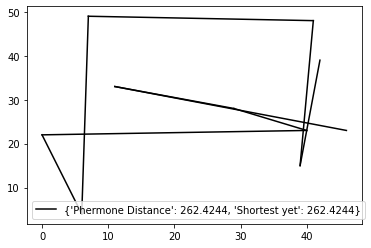

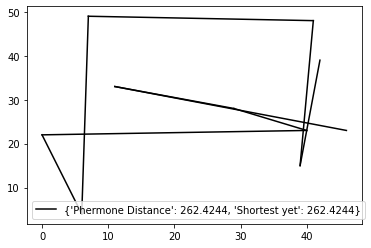

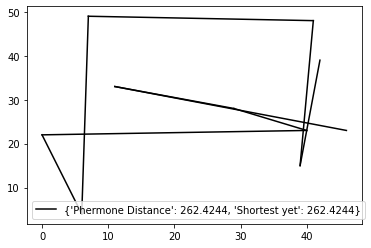

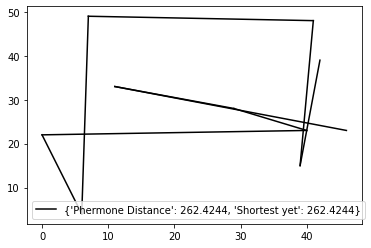

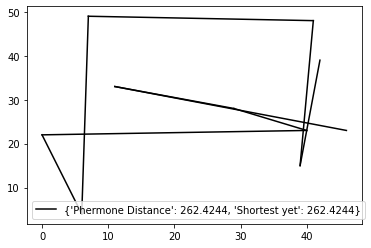

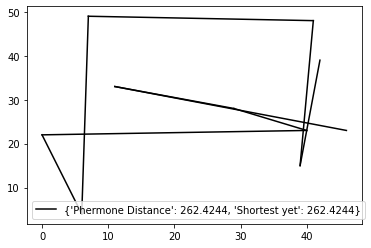

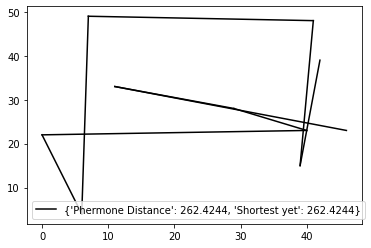

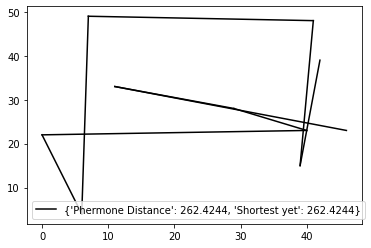

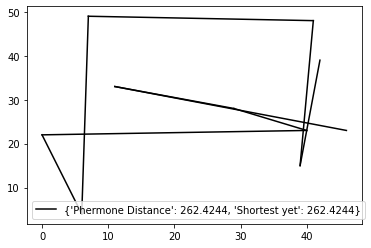

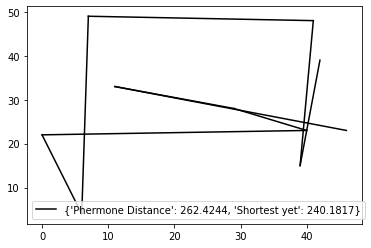

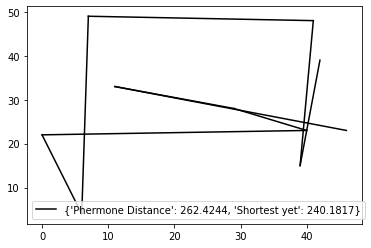

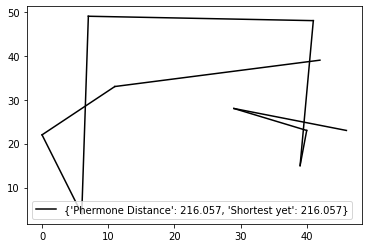

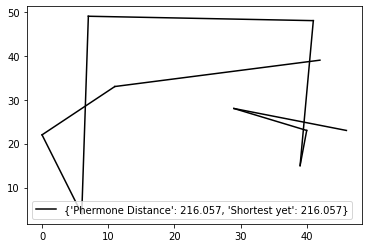

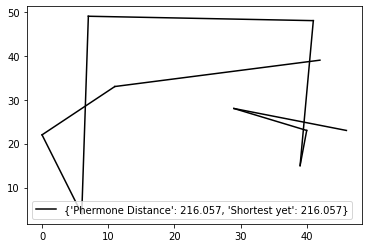

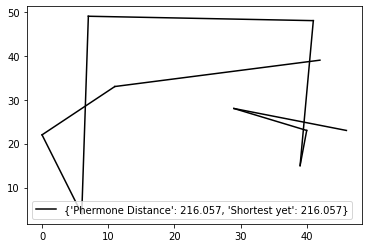

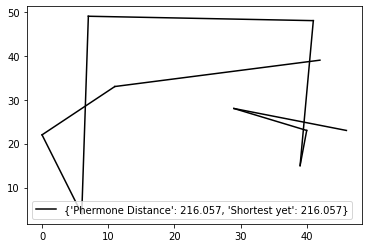

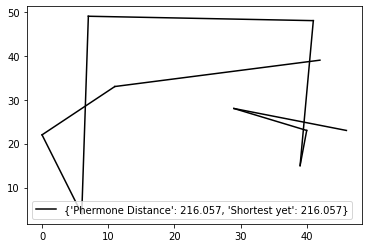

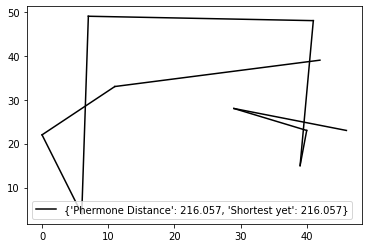

In [6]:
ac = AntColony(cities, 20)
for _ in range(20):
  ac.ant_colony(2)